In [209]:
import os
import re

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym
import numpy as np
import random

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

from PIL import Image

import pdb

In [34]:
game_id = 981749
model_dir = './'
images_dir = 'img/' + str(game_id) + '/'
class_dirs = [images_dir + d + '/' for d in os.listdir(images_dir) if d.find('mover') == 0]

In [35]:
def create_graph():
  """Creates a graph from saved GraphDef file and returns a saver."""
  # Creates graph from saved graph_def.pb.
  with tf.gfile.FastGFile(os.path.join(
      model_dir, 'classify_image_graph_def.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

In [39]:
def extract_features(class_dirs):
    nb_features = 2048
    features = []
    labels = []
    
    create_graph()

    with tf.Session() as sess:

        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')

        ind = 0
        for class_dir in class_dirs:
            class_label = int(class_dir[class_dir.find('mover')+5:-1])
            list_images = [class_dir+f for f in os.listdir(class_dir) if re.search('jpg|JPG', f)]
            for image in list_images:
                if (ind%1 == 0):
                    print('Processing %s...' % (image))
                if not gfile.Exists(image):
                    tf.logging.fatal('File does not exist %s', image)

                image_data = gfile.FastGFile(image, 'rb').read()
                feature_vec = sess.run(next_to_last_tensor,
                                       {'DecodeJpeg/contents:0': image_data})
                features.append(np.squeeze(feature_vec))
                labels.append(class_label)
                ind += 1
    return features, labels

In [40]:
features_l, labels_l = extract_features(class_dirs);
features = np.array(features_l)
labels = np.array(labels_l)

Processing img/981749/mover0/136544.jpg...
Processing img/981749/mover0/244560.jpg...
Processing img/981749/mover0/296909.jpg...
Processing img/981749/mover0/297229.jpg...
Processing img/981749/mover0/399094.jpg...
Processing img/981749/mover0/403805.jpg...
Processing img/981749/mover0/406640.jpg...
Processing img/981749/mover0/425961.jpg...
Processing img/981749/mover0/485055.jpg...
Processing img/981749/mover0/531068.jpg...
Processing img/981749/mover0/544901.jpg...
Processing img/981749/mover0/570139.jpg...
Processing img/981749/mover0/577790.jpg...
Processing img/981749/mover0/582255.jpg...
Processing img/981749/mover0/613053.jpg...
Processing img/981749/mover0/67752.jpg...
Processing img/981749/mover0/682278.jpg...
Processing img/981749/mover0/777396.jpg...
Processing img/981749/mover0/868603.jpg...
Processing img/981749/mover0/974990.jpg...
Processing img/981749/mover1/165986.jpg...
Processing img/981749/mover1/176147.jpg...
Processing img/981749/mover1/240694.jpg...
Processing i

In [211]:
LR = LogisticRegression()
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.25)
LR.fit(f_train,l_train)
LR.score(f_test,l_test)

0.76470588235294112

In [249]:
LR.fit(features, labels)

LB = LabelBinarizer()
lb_labels = LB.fit_transform(labels)

for i in range(max(labels)+1):
    features_i = features[labels == i]
    labels_i = lb_labels[labels == i]
    print i, log_loss(labels_i, LR.predict_proba(features_i))
    print 'rand', log_loss(labels_i, np.random.randint())

0 0.0199053077665
1 0.132304505564
2 0.119596426386
3 0.180637490024


In [264]:
LR.

(67, 806)

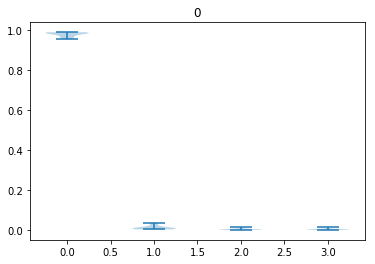

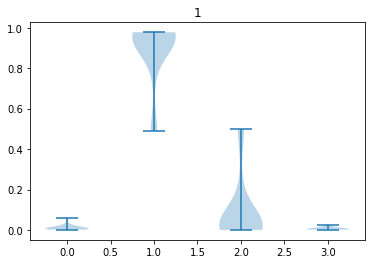

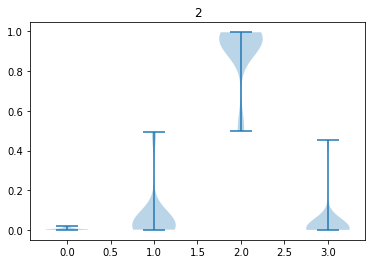

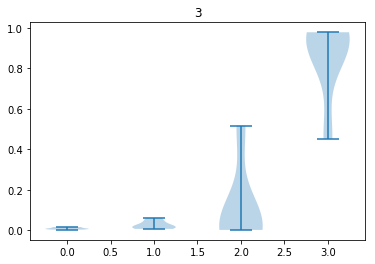

In [193]:
KMs = []
for i in range(4):
    probs = LR.predict_proba(features[np.array(labels) == i])
    KMs.append (KM.predict(features[np.array(labels) == i]))
    fig = plt.figure()
    plt.title(str(i))
    plt.violinplot(probs, positions=range(4))
    '''
    for j in range(4):
        plt.hist(probs[:,j],normed=True,label=str(j),bins=3)
        plt.legend()
    '''

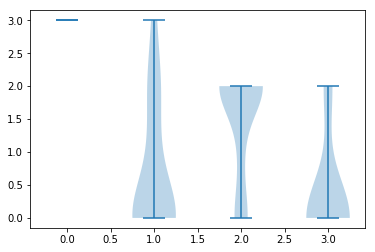

In [149]:
plt.violinplot(KMs, positions=range(4));

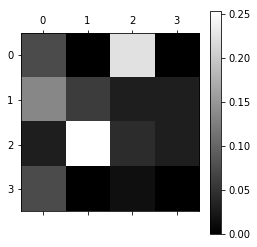

In [182]:
KM = KMeans(4)
KMlabels = KM.fit_predict(features)
label_mat = np.zeros((4,4))
for (label,KMlabel) in zip(KMlabels, labels):
    label_mat[KMlabel, label] += 1
    
plt.matshow(label_mat/len(labels),cmap='gray')
plt.colorbar()

In [183]:
KM.inertia_

4666.1846196768302